## ANOVA Test

In [1]:
# import pandas
import pandas as pd

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statistics to perform statistical computation  
import statistics

# import 'stats' package from scipy library
from scipy import stats

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# to test the normality 
from scipy.stats import shapiro

# import the function to calculate the power of test
from statsmodels.stats import power

### What is ANOVA Test?

- ANOVA test can be defined as a type of test used in hypothesis testing to compare whether the means of two or more groups are equal or not.
- The ANOVA test applies when there are more than two independent groups. 
- The goal of the ANOVA test is to check for variability within the groups as well as the variability among the groups.
- The ANOVA test statistic is given by the f test.

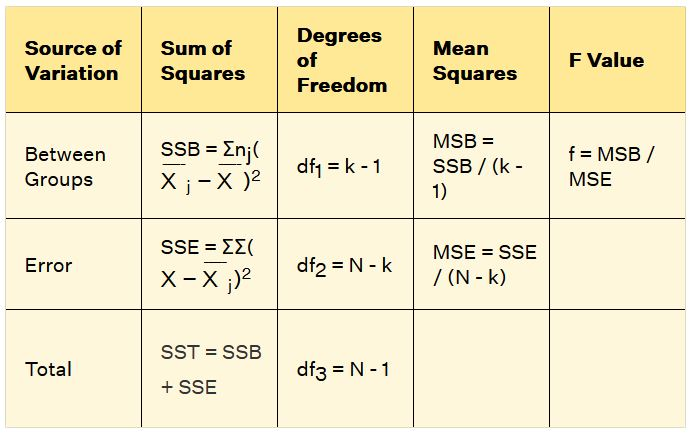

- ANOVA tells you if the dependent variable changes according to the level of the independent variable. 
For example:

1. Your independent variable is social media use, and you assign groups to low, medium, and high levels of social media use to find out if there is a difference in hours of sleep per night.
2. Your independent variable is brand of soda, and you collect data on Coke, Pepsi, Sprite, and Fanta to find out if there is a difference in the price per 100ml.

### Assumptions of ANOVA


1. Independence of observations: 
- Data were collected using statistically-valid methods, and there are no hidden relationships among observations.

2. Normally-distributed response variable: 
- The values of the dependent variable follow a normal distribution.

3. Homogeneity of variance: 
- The variation within each group being compared is similar for every group. If the variances are different among the groups, then ANOVA probably isn’t the right fit for the data.

### The steps to perform the one way ANOVA test are given below:

- Step 1: Calculate the mean for each group.
- Step 2: Calculate the total mean. This is done by adding all the means and dividing it by the total number of means.
- Step 3: Calculate the SSB.
- Step 4: Calculate the between groups degrees of freedom.
- Step 5: Calculate the SSE.
- Step 6: Calculate the degrees of freedom of errors.
- Step 7: Determine the MSB and the MSE.
- Step 8: Find the f test statistic.
- Step 9: Using the f table for the specified level of significance, α, find the critical value. This is given by F(α, df1.df2).
- Step 10: If f > F then reject the null hypothesis.


### One Way ANOVA

- The one way ANOVA test is used to determine whether there is any difference between the means of three or more groups. A
- Use a one-way ANOVA when you have collected data about one categorical independent variable and one quantitative dependent variable. 
- The independent variable should have at least three levels (i.e. at least three different groups or categories).


- ANOVA tells you if the dependent variable changes according to the level of the independent variable. 

    For example:

1. Your independent variable is social media use, and you assign groups to low, medium, and high levels of social media use to find out if there is a difference in hours of sleep per night.
2. Your independent variable is brand of soda, and you collect data on Coke, Pepsi, Sprite, and Fanta to find out if there is a difference in the price per 100ml.

- Null Hypothesis, H0: μ1 = μ2 = μ3 = ... = μk
- Alternative Hypothesis, H1: The means are not equal
- Decision Rule: If test statistic > critical value then reject the null hypothesis and conclude that the means of at least two groups are statistically significant


### Two Way ANOVA

- The two way ANOVA has two independent variables.
- A two way ANOVA test is used to check the main effect of each independent variable and to see if there is an interaction effect between them.

### When to use a two-way ANOVA

- You can use a two-way ANOVA when you have collected data on a quantitative dependent variable at multiple levels of two categorical independent variables.
- A quantitative variable represents amounts or counts of things. It can be divided to find a group mean.
- A categorical variable represents types or categories of things. A level is an individual category within the categorical variable.


### How does an ANOVA test work?

- ANOVA determines whether the groups created by the levels of the independent variable are statistically different by calculating whether the means of the treatment levels are different from the overall mean of the dependent variable.
- If any of the group means is significantly different from the overall mean, then the null hypothesis is rejected.


- ANOVA uses the F-test for statistical significance. 
- The F-test compares the variance in each group mean from the overall group variance.
- If the variance within groups is smaller than the variance between groups, the F-test will find a higher F-value, and therefore a higher likelihood that the difference observed is real and not due to chance.

### One-way ANOVA Test

In [2]:
df_sales=pd.read_csv(r"C:\Users\Shree\Desktop\ANALYTICS VIDYA\PYTHON\class\sales_emp.csv")
df_sales.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,36,Travel_Rarely,1218,9,4,Life Sciences,1,27,3,82,...,2,80,0,10,4,3,5,3,0,3
1,39,Travel_Rarely,895,5,3,Technical Degree,1,42,4,56,...,3,80,1,19,6,4,1,0,0,0
2,50,Travel_Rarely,869,3,2,Marketing,1,47,1,86,...,3,80,0,3,2,3,3,2,0,2
3,46,Travel_Rarely,669,9,2,Medical,1,118,3,64,...,4,80,0,9,3,3,9,8,4,7
4,25,Non-Travel,240,5,3,Marketing,1,142,3,46,...,4,80,0,6,1,3,6,4,0,3


In [3]:
df_sales.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Example 1:
- Use the sales employees' dataset to test whether the average monthly income of sales executives with different education background is equal or not. Use a critical value method with 95% confidence.

  The null and alternative hypothesis is:

- H0: The average monthly income for all the education fields is the same

- H1: The average monthly income due to at least one education field is different

In [4]:
df_sales.groupby("EducationField").agg({"MonthlyIncome":"mean"})

,MonthlyIncome
EducationField,
Life Sciences,6932.312500
Marketing,6016.400000
Medical,5776.000000
Other,4034.250000
Technical Degree,4631.666667


In [5]:
from scipy import stats

In [6]:
s1=df_sales[df_sales["EducationField"]=="Life Sciences"]["MonthlyIncome"]
s2=df_sales[df_sales["EducationField"]=="Marketing"]["MonthlyIncome"]
s3=df_sales[df_sales["EducationField"]=="Medical"]["MonthlyIncome"]
s4=df_sales[df_sales["EducationField"]=="Other"]["MonthlyIncome"]
s5=df_sales[df_sales["EducationField"]=="Technical Degree"]["MonthlyIncome"]

In [7]:
## Check for shapiroo test to check normality
alpha=0.05
stat, p_value = shapiro(df_sales["MonthlyIncome"])
print("p-value:",p_value)

if(p_value >= alpha):
    print("Follows Normal Distribution")
else:
    print("Does not follow normal distribution")

p-value: 0.05732710659503937
Follows Normal Distribution


In [8]:
## check for levine test

alpha=0.05
stat, p_value = stats.levene(s1,s2,s3,s4,s5)
print("p-value:",p_value)

if(p_value >= alpha):
    print("Follows levine test")
else:
    print("Does not follow levine test")

p-value: 0.23476859109336565
Follows levine test


In [9]:
n=df_sales.shape[0] ## no of rows
n

54

### stats.f_oneway()

- Perform one-way ANOVA.
- The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. 
- The test is applied to samples from two or more groups, possibly with differing sizes.

In [10]:
alpha=0.05
n=df_sales.shape[0] # no of datapoints(samples)
k=5 # k no of groups

test_stat, p_value = stats.f_oneway(s1,s2,s3,s4,s5)
print("test statistic:",test_stat)
print("p-value:",p_value)

critical_value=stats.f.isf(q = alpha, dfn =k-1 , dfd =n-k )
print("critical value:",critical_value)

## P-value approach
if p_value <=alpha:   
    print("P-value approach: Reject null hypothesis")
else:
    print("P-value approach: Fail to reject null hypothesis")
    
## Critical value approach
if(test_stat >= critical_value):
    print("Critical value approach: Reject null hypothesis")
else:
    print("Critical value approach: Fail to reject null hypothesis")

test statistic: 0.9546031924978221
p-value: 0.4407865128409415
critical value: 2.561124033899875
P-value approach: Fail to reject null hypothesis
Critical value approach: Fail to reject null hypothesis


Conclusion:
- The average monthly income for all the education fields is the same

Example 2 :
- There are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not 


In [11]:
df_iris=sns.load_dataset('iris')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df_iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [13]:
s1=df_iris[df_iris["species"]=="setosa"]["petal_width"]
s2=df_iris[df_iris["species"]=="versicolor"]["petal_width"]
s3=df_iris[df_iris["species"]=="virginica "]["petal_width"]

In [14]:
df_iris.shape[0]

150

In [15]:
alpha=0.05
n=df_iris.shape[0] # no of datapoints(samples)
k=3 # k no of groups

test_stat, p_value = stats.f_oneway(s1,s2,s3)
print("test statistic:",test_stat)
print("p-value:",p_value)

critical_value=stats.f.isf(q = alpha, dfn =k-1 , dfd =n-k )
print("critical value:",critical_value)

## P-value approach
if p_value <=alpha:   
    print("P-value approach: Reject null hypothesis")
else:
    print("P-value approach: Fail to reject null hypothesis")
    
## Critical value approach
if(test_stat >= critical_value):
    print("Critical value approach: Reject null hypothesis")
else:
    print("Critical value approach: Fail to reject null hypothesis")

test statistic: nan
p-value: nan
critical value: 3.057620651649394
P-value approach: Fail to reject null hypothesis
Critical value approach: Fail to reject null hypothesis


### References:
- https://www.scribbr.com/statistics/one-way-anova/
- https://www.scribbr.com/statistics/two-way-anova/
- https://www.cuemath.com/anova-formula/